# Gradable Case 5

## Introduction

**Problem.** You are tasked  to build a classification model to predict the segment that a customer belongs to based on features extracted from the person.

**Analytical Context.** The data is in a .csv file which can directly be read in. Throughout the case, you will be using the Python `scikitlearn` package to create and analyze classification models and their prediction capacity.

## Packages Import

In [ ]:
!pip install statsmodels

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  RocCurveDisplay
from sklearn.model_selection import GridSearchCV

## Data Import

All data used on this case is pulished under a [Public Domain](http://creativecommons.org/publicdomain/zero/1.0/) license from [Kaggle](https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation?resource=download).

Data tables are usually accompanied by a data dictionary that explains the content of the information contained in one of the columns and some times provides some business context.
In the case of these data, the dictionary can be obtained at: [Data Dictionary](https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation?resource=download)

In [ ]:
df_train_customer = pd.read_csv('/work/indu5012_gradable_case_5/data/Train.csv')
df_train_customer.head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
df_test_customer = pd.read_csv('/work/indu5012_gradable_case_5/data/Test.csv')
df_test_customer.head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


## Exploratory Data Analysis y Data Cleaning

### Missing Values

In [ ]:
print('Train: ', df_train_customer.columns)
print('Test: ', df_test_customer.columns)

Train:  Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')
Test:  Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')


In [ ]:
print('Train: ', df_train_customer.shape)
print('Test: ', df_test_customer.shape)

Train:  (8068, 11)
Test:  (2627, 11)


In [ ]:
print('Train: ', df_train_customer.isnull().sum())
print('Test: ', df_test_customer.isnull().sum())

Train:  ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64
Test:  ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
Segmentation         0
dtype: int64


In [ ]:
df_train_customer.dropna(inplace=True)
df_test_customer.dropna(inplace=True)

### Information on the columns

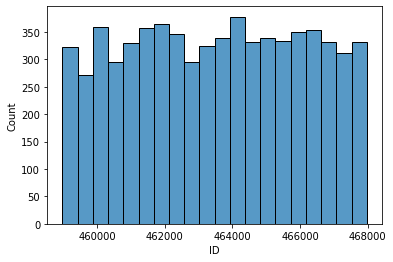

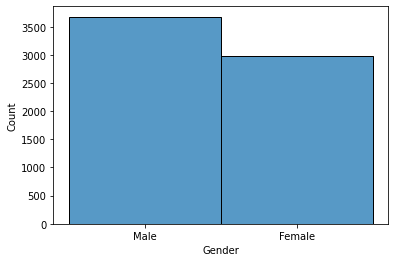

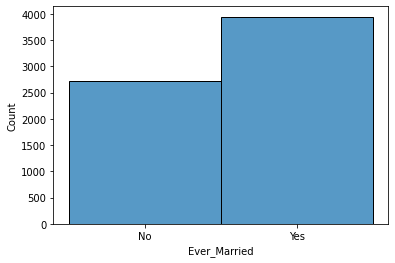

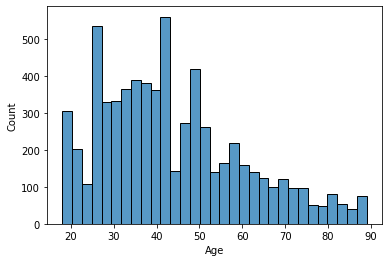

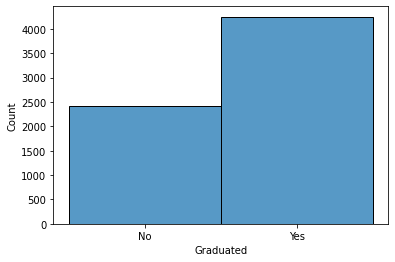

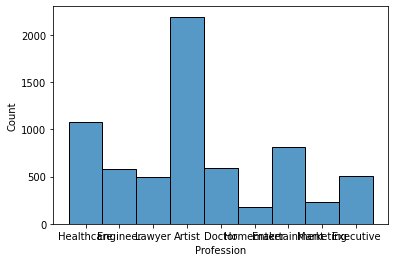

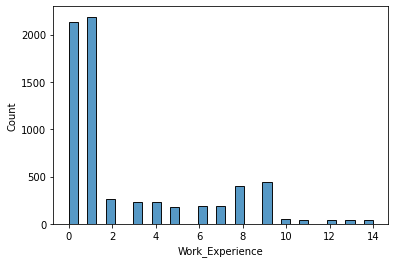

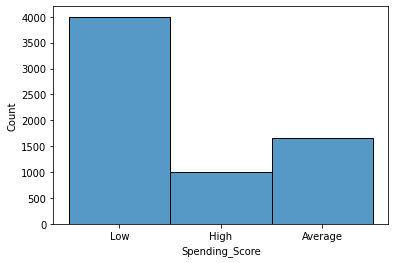

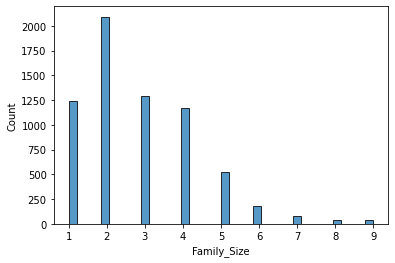

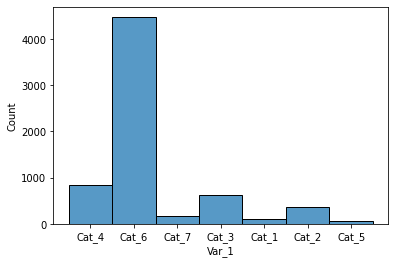

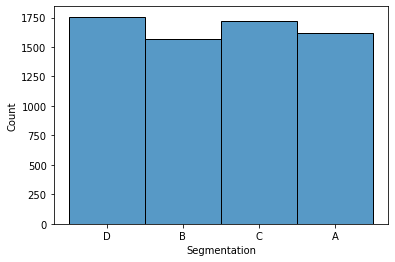

In [ ]:
for column in df_train_customer.columns:
    sns.histplot(x= column,data = df_train_customer)
    plt.show()

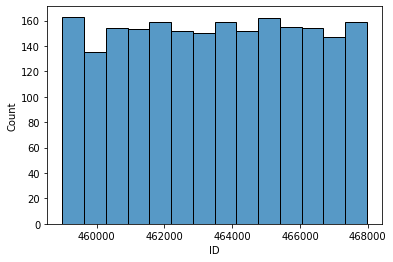

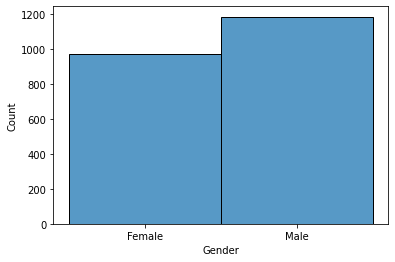

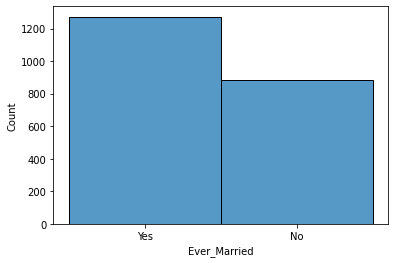

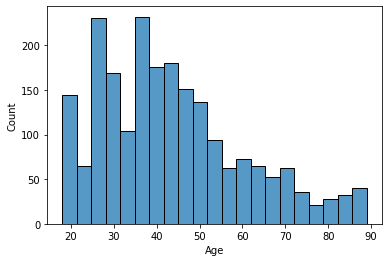

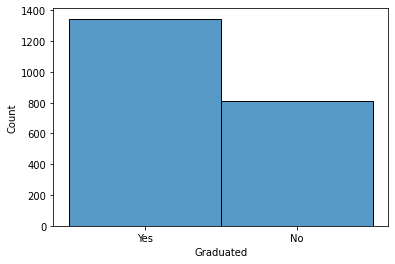

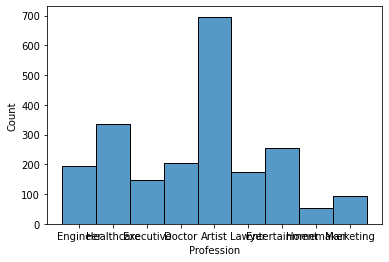

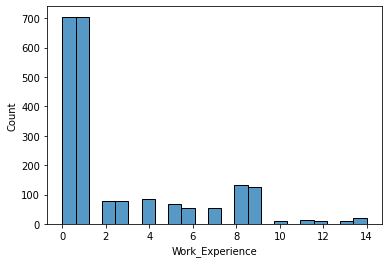

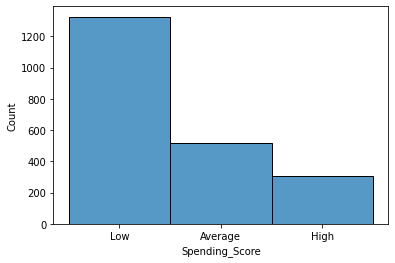

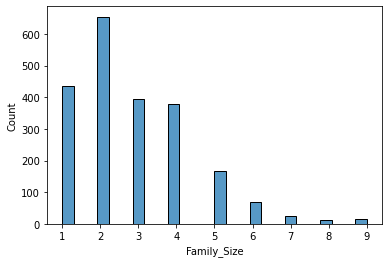

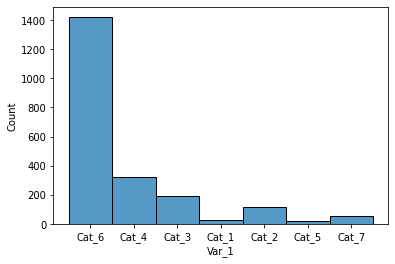

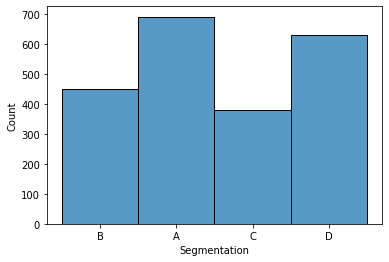

In [ ]:
for column in df_test_customer.columns:
    sns.histplot(x= column,data = df_test_customer)
    plt.show()

In [ ]:
df_train_customer.drop(['ID'], axis=1, inplace=True)
df_test_customer.drop(['ID'], axis=1, inplace=True)

### Econding the information

In [ ]:
df_train_customer = pd.get_dummies(df_train_customer, columns = ["Gender", "Ever_Married", "Graduated", "Profession", "Spending_Score", "Var_1"], drop_first = True)
df_train_customer.head()

df_test_customer = pd.get_dummies(df_test_customer, columns = ["Gender", "Ever_Married", "Graduated", "Profession", "Spending_Score", "Var_1"], drop_first = True)
df_test_customer.head()

df_train_customer['Segmentation'].replace({'A':0,'B':1,'C':2,'D':3}, inplace=True)
df_train_customer['Segmentation'].unique()

array([3, 1, 2, 0])

In [ ]:
df_train_customer_sample = df_train_customer.sample(500, random_state=55555555).copy()
X_train = df_train_customer_sample.drop(columns='Segmentation')
Y_train = df_train_customer_sample['Segmentation']

## Fitting classification models

**Use the `df_train_customer` dataset to train the classification model**

### Exercise 1:

Select a metric that you are going to use in order to measure your models' classificaction performance. Justify your selection.

### Exercise 2:

Wich parameters can be modified for a SVC model? What do they mean? What values do yo consider aceptable in order to test the model?

### Exercise 3:

Find the best support vector classifier model to predict the segment that a customer belongs to. In order to do that, use the cross-validation process to find the best `C` and `gamma` parameters for the prediction while using a linear kernel. Use the error metric you selected to determine the best parameters. Report the best parameters you found.

### Exercise 4:

Find the best support vector machine model to predict the segment that a customer belongs to. In order to do that, use the cross-validation process to find the best `C` and `gamma` parameters for the prediction while using a polynomial kernel. Use the error metric you selected to determine the best parameters. Report the best parameters you found.

### Exercise 5:

Find the best support vector classifier model to predict the segment that a customer belongs to. In order to do that, use the cross-validation process to find the best `C` and `gamma` parameters for the prediction while using a radial kernel. Use the error metric you selected to determine the best parameters. Report the best parameters you found.

### Exercise 6:

Determine the best classification model based on the error metric you chose.Why do you think that specific model has a better performance on the dataset? (You may consider: Kernel type, dataset distribution, performance metric)

### Exercise 7:

Report the metric value obtained by your model over the test dataset (`df_test`) for the metric you selected to compare classification models. Do you think that metric is good enough?

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=96262903-a28f-4719-a328-dc59e3cfa77f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>